# 🎓 Smart Placement Prediction System (Beginner Friendly)

This notebook walks you through creating a **placement prediction system** using a machine learning model.
We will:
- Load and explore the dataset
- Preprocess it
- Train a model
- Make predictions
- Evaluate the model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the placement dataset
df = pd.read_csv("placement_data.csv")
df.head()


,gender,stream,tenth_score,twelfth_score,cgpa,aptitude_score,technical_score,internships,projects,placed
0,Male,EEE,92.98,91.69,6.93,99,92,0,4,1
1,Male,MECH,53.54,85.18,7.88,40,25,1,0,1
2,Female,EEE,61.90,80.58,6.27,47,64,2,1,1
3,Male,MECH,83.45,99.36,8.54,49,88,1,3,1
4,Male,ECE,60.71,82.70,5.01,59,74,2,4,1


In [3]:
# Check for missing values and data types
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           100 non-null    object 
 1   stream           100 non-null    object 
 2   tenth_score      100 non-null    float64
 3   twelfth_score    100 non-null    float64
 4   cgpa             100 non-null    float64
 5   aptitude_score   100 non-null    int64  
 6   technical_score  100 non-null    int64  
 7   internships      100 non-null    int64  
 8   projects         100 non-null    int64  
 9   placed           100 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.9+ KB


gender             0
stream             0
tenth_score        0
twelfth_score      0
cgpa               0
aptitude_score     0
technical_score    0
internships        0
projects           0
placed             0
dtype: int64

In [4]:
# Encode 'gender' and 'stream' columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Male = 1, Female = 0
df['stream'] = le.fit_transform(df['stream'])  # Streams encoded as integers

df.head()


,gender,stream,tenth_score,twelfth_score,cgpa,aptitude_score,technical_score,internships,projects,placed
0,1,3,92.98,91.69,6.93,99,92,0,4,1
1,1,5,53.54,85.18,7.88,40,25,1,0,1
2,0,3,61.90,80.58,6.27,47,64,2,1,1
3,1,5,83.45,99.36,8.54,49,88,1,3,1
4,1,2,60.71,82.70,5.01,59,74,2,4,1


In [5]:
# Split dataset into features and target
X = df.drop("placed", axis=1)
y = df["placed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

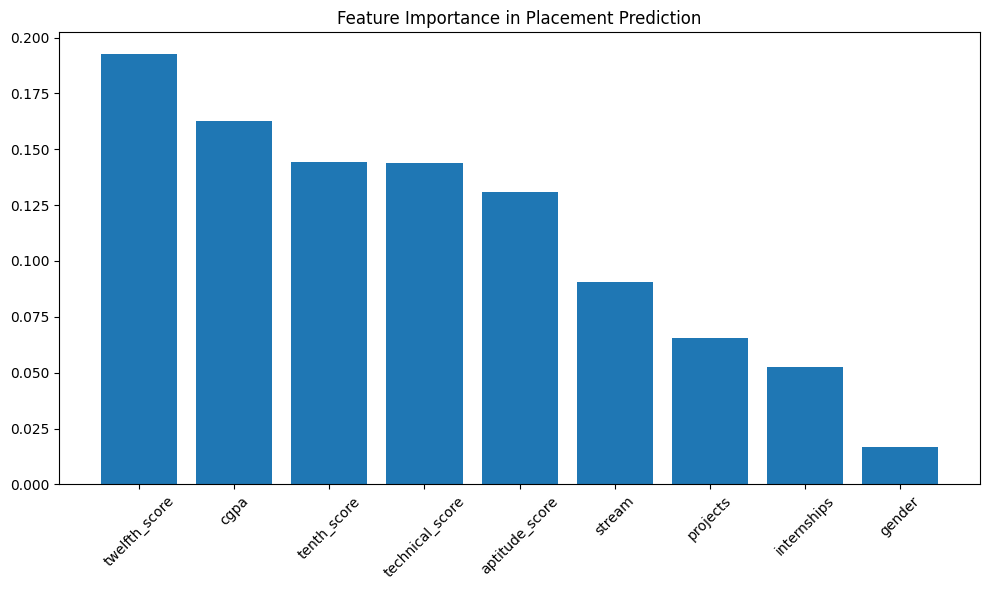

In [7]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model.feature_importances_
features = X.columns

# Sort features by importance
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importance in Placement Prediction")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.67      0.67      0.67        15

    accuracy                           0.50        20
   macro avg       0.33      0.33      0.33        20
weighted avg       0.50      0.50      0.50        20



In [9]:
# Predict placement for a new student
new_student = pd.DataFrame({
    'gender': [1],           # Male
    'stream': [2],           # Example stream code (e.g., CSE)
    'tenth_score': [85.0],
    'twelfth_score': [88.0],
    'cgpa': [8.5],
    'aptitude_score': [75],
    'technical_score': [80],
    'internships': [1],
    'projects': [2]
})

prediction = model.predict(new_student)
print("Placement Prediction (1=Placed, 0=Not Placed):", prediction[0])


Placement Prediction (1=Placed, 0=Not Placed): 1


In [10]:
# Save the model for use in Streamlit or web app later
import joblib
joblib.dump(model, "placement_model.pkl")


['placement_model.pkl']